# python 3 or 2.7?????

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime

from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
!which python

/home/clepore/.conda/envs/general_python3/bin/python


In [3]:
!which R

/usr/bin/R


In [4]:
import os


In [5]:
import Nio
import glob

In [6]:
!pwd


/home/clepore/SubX_usecase


In [7]:
ds_merged_allM=xr.open_dataset('ds_merged_EMC_allM.nc')

In [8]:
ds_merged=xr.open_dataset('ds_merged_EMC.nc')
ds_merged_mean=xr.open_dataset('ds_merged_mean_EMC.nc')

In [9]:
ds_merged

<xarray.Dataset>
Dimensions:   (T: 237, lat: 11, lon: 14)
Coordinates:
  * lat       (lat) float32 32.0 33.0 34.0 35.0 36.0 ... 39.0 40.0 41.0 42.0
  * lon       (lon) float32 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * T         (T) datetime64[ns] 1999-06-03T12:00:00 ... 2016-09-01T12:00:00
Data variables:
    apcp      (T, lat, lon) float32 ...
    pr        (T, lat, lon) float32 ...
    tas       (T, lat, lon) float32 ...
    tdps      (T, lat, lon) float32 ...
    cape      (T, lat, lon) float32 ...
    apcp_rep  (T, lat, lon) float32 ...

In [10]:
df_merged = ds_merged[['apcp_rep','pr','tas','tdps','cape']].to_dataframe()
df_merged = df_merged.reset_index()
print(df_merged.shape)
df_merged.head(5)

(36498, 8)


,T,lat,lon,apcp_rep,pr,tas,tdps,cape
0,1999-06-03 12:00:00,32.0,257.0,0.037341,0.585714,302.508087,279.933777,440.038940
1,1999-06-03 12:00:00,32.0,258.0,0.177661,0.715065,302.152191,284.864960,759.519470
2,1999-06-03 12:00:00,32.0,259.0,0.322088,0.576623,302.282349,287.261047,896.039062
3,1999-06-03 12:00:00,32.0,260.0,0.454268,0.485714,302.188538,288.628601,888.779236
4,1999-06-03 12:00:00,32.0,261.0,0.267235,0.255714,301.619476,290.136353,917.792175


In [11]:
df_merged_mean = ds_merged_mean[['apcp_rep','pr','tas','tdps','cape']].to_dataframe()
df_merged_mean = df_merged_mean.reset_index()

In [12]:
import bottleneck

def covariance_gufunc(x, y):
    return ((x - x.mean(axis=-1, keepdims=True))
            * (y - y.mean(axis=-1, keepdims=True))).mean(axis=-1)

def pearson_correlation_gufunc(x, y):
    return covariance_gufunc(x, y) / (x.std(axis=-1) * y.std(axis=-1))

def spearman_correlation_gufunc(x, y):
    x_ranks = bottleneck.rankdata(x, axis=-1)
    y_ranks = bottleneck.rankdata(y, axis=-1)
    return pearson_correlation_gufunc(x_ranks, y_ranks)

def spearman_correlation(x, y, dim):
    return xr.apply_ufunc(
        spearman_correlation_gufunc, x, y,
        input_core_dims=[[dim], [dim]],
        dask='parallelized',
        output_dtypes=[float])

def covariance_gufunc(x, y):
    return ((x - x.mean(axis=-1, keepdims=True))
            * (y - y.mean(axis=-1, keepdims=True))).mean(axis=-1)

def pearson_correlation_gufunc(x, y):
    return covariance_gufunc(x, y) / (x.std(axis=-1) * y.std(axis=-1))

def spearman_correlation_gufunc(x, y):
    x_ranks = bottleneck.rankdata(x, axis=-1)
    y_ranks = bottleneck.rankdata(y, axis=-1)
    return pearson_correlation_gufunc(x_ranks, y_ranks)

def spearman_correlation(x, y, dim):
    return xr.apply_ufunc(
        spearman_correlation_gufunc, x, y,
        input_core_dims=[[dim], [dim]],
        dask='parallelized',
        output_dtypes=[float])


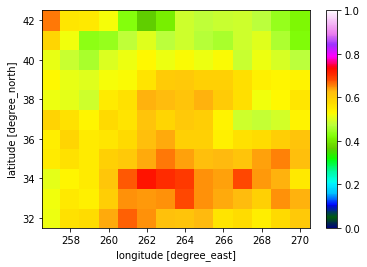

In [13]:
spearman_correlation(ds_merged.apcp_rep, ds_merged.pr/8.,'T').plot(vmin=0,vmax=1, cmap='gist_ncar')

# fix units

In [14]:
df_merged['pr']= df_merged['pr']/8 # 3 hourly and not daily
df_merged[0:17500].tail(5)

,T,lat,lon,apcp_rep,pr,tas,tdps,cape
17495,2007-08-02 12:00:00,38.0,266.0,0.007340,0.009740,301.376099,292.367554,505.870087
17496,2007-08-02 12:00:00,38.0,267.0,0.042064,0.019481,301.947937,290.753265,333.402588
17497,2007-08-02 12:00:00,38.0,268.0,0.033205,0.013474,302.254547,290.177948,265.116913
17498,2007-08-02 12:00:00,38.0,269.0,0.098342,0.006494,302.170929,290.101318,251.311676
17499,2007-08-02 12:00:00,38.0,270.0,0.130875,0.016721,303.693390,289.093506,236.519470


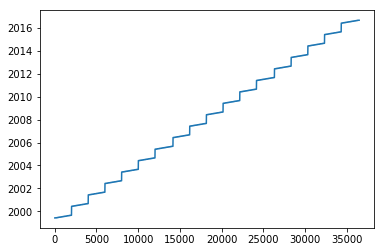

In [15]:
df_merged['T'].plot()

In [16]:
df_merged_mean['pr']= df_merged_mean['pr']/8 # 3 hourly and not daily
df_merged_mean.head(5)

,T,apcp_rep,pr,tas,tdps,cape
0,1999-06-03 12:00:00,0.256931,0.307680,299.555054,287.567566,1081.592529
1,1999-06-10 12:00:00,0.723767,0.731022,297.214691,288.922302,653.793030
2,1999-06-17 12:00:00,0.437628,0.181610,297.498871,286.428131,542.377014
3,1999-06-24 12:00:00,0.752838,0.473693,300.283844,290.532379,1205.066406
4,1999-07-01 12:00:00,0.269029,0.196849,301.867706,290.326385,1007.021423


In [17]:
#thisis not normalized
df_merged['y']=df_merged.apcp_rep*1.
df_merged_mean['y']=df_merged_mean.apcp_rep*1.


In [18]:
df_merged['logpr'] = np.log(df_merged['pr'])
df_merged_mean['logpr'] = np.log(df_merged_mean['pr'])
df_merged.replace([np.inf, -np.inf], np.nan, inplace=True)
df_merged = df_merged.dropna()

df_merged['logcape'] = np.log(df_merged['cape'])
df_merged_mean['logcape'] = np.log(df_merged_mean['cape'])
df_merged.replace([np.inf, -np.inf], np.nan, inplace=True)
df_merged = df_merged.dropna()
df_merged['logtas'] = np.log(df_merged['tas'])
df_merged_mean['logtas'] = np.log(df_merged_mean['tas'])
df_merged.replace([np.inf, -np.inf], np.nan, inplace=True)
df_merged = df_merged.dropna()
df_merged['logtdps'] = np.log(df_merged['tdps'])
df_merged_mean['logtdps'] = np.log(df_merged_mean['tdps'])
df_merged.replace([np.inf, -np.inf], np.nan, inplace=True)
df_merged = df_merged.dropna()

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [19]:
df_merged_mean.describe()

,apcp_rep,pr,tas,tdps,cape,y,logpr,logcape,logtas,logtdps
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,0.361195,0.302987,300.827698,287.990448,597.848389,0.361195,-1.372250,6.286392,5.706514,5.662901
std,0.187245,0.174201,2.177528,2.008595,255.106735,0.187245,0.629052,0.496498,0.007243,0.006987
min,0.046803,0.041472,295.221741,282.421082,74.198677,0.046803,-3.182737,4.306746,5.687727,5.643399
25%,0.227192,0.169703,299.191956,286.615234,414.422089,0.227192,-1.773708,6.026885,5.701086,5.658141
50%,0.330463,0.268785,300.909302,288.322571,572.120789,0.330463,-1.313843,6.349350,5.706809,5.664080
75%,0.455115,0.417162,302.412933,289.525055,766.679565,0.455115,-0.874282,6.642069,5.711793,5.668242
max,1.019700,0.881300,305.651794,291.924652,1274.372925,1.019700,-0.126358,7.150209,5.722446,5.676496


In [20]:
X = df_merged[['apcp_rep','pr','tas','tdps','cape','logpr','logcape','logtas','logtdps','T']]
y = df_merged.loc[:, df_merged.columns == 'y']
X['const']=1

Xm = df_merged_mean[['apcp_rep','pr','tas','tdps','cape','logpr','logcape','logtas','logtdps','T']]
ym = df_merged_mean.loc[:, df_merged_mean.columns == 'y']
Xm['const']=1

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import log_loss

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
def random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,firstmodel,secondmodel):
    if len(y_trainT.shape)==2:
        REAL = REAL.values[:,0]
    elif len(y_trainT.shape)==1:
        REAL = REAL.values[:]
        
    AA = ((REAL-PREDICTION_A.values)**2)**(1/2.)
    BB = ((REAL-PREDICTION_B.values)**2)**(1/2.)
    better_AA = AA<BB
    better_AA = better_AA.astype(int)
    better_AA[better_AA==0]=-1
    plt.plot(np.cumsum(better_AA), label=secondmodel)
    plt.title(firstmodel)
    plt.legend( bbox_to_anchor=(1.3, 1))
#     plt.yscale('symlog')

In [23]:
def random_walk_mike_map(TIMEINDEX, REAL, PREDICTION_A, PREDICTION_B,firstmodel,secondmodel,ax):
    if len(y_trainT.shape)==2:
        REAL = REAL.values[:,0]
    elif len(y_trainT.shape)==1:
        REAL = REAL.values[:]
    df_temp = TIMEINDEX
    df_temp['REAL']= REAL
    df_temp['PA'] = PREDICTION_A.values
    df_temp['PB'] = PREDICTION_B.values
    AA=np.zeros((pd.unique(df_temp['T']).shape))
    BB=np.zeros((pd.unique(df_temp['T']).shape))
    for ik,(k,gp) in enumerate(df_temp.groupby('T')):
       
        AA[ik] = np.sum((gp.REAL.values-gp.PA.values)**2)
        BB[ik] = np.sum((gp.REAL.values-gp.PB.values)**2)
    better_AA = AA<BB
    better_AA = better_AA.astype(int)
    better_AA[better_AA==0]=-1
    ax.plot(np.cumsum(better_AA), label=secondmodel)
    ax.set_title(firstmodel)
    ax.legend( bbox_to_anchor=(1.1, 1))
    #     plt.yscale('symlog')

In [24]:
def random_walk_mike_map_BSS(TIMEINDEX, REAL, PREDICTION_A, PREDICTION_B,CLIMO,firstmodel,secondmodel,ax):
    if len(y_trainT.shape)==2:
        REAL = REAL.values[:,0]
    elif len(y_trainT.shape)==1:
        REAL = REAL.values[:]
    df_temp = TIMEINDEX
    df_temp['REAL']= REAL
    df_temp['PA'] = PREDICTION_A.values
    df_temp['PB'] = PREDICTION_B.values
    df_temp['CL'] = CLIMO.values
    AA=np.zeros((pd.unique(df_temp['T']).shape))
    BB=np.zeros((pd.unique(df_temp['T']).shape))
    CC=np.zeros((pd.unique(df_temp['T']).shape))

    for ik,(k,gp) in enumerate(df_temp.groupby('T')):
       
        AA[ik] = np.sum((gp.REAL.values-gp.PA.values)**2)
        BB[ik] = np.sum((gp.REAL.values-gp.PB.values)**2)
        CC[ik] = np.sum((gp.REAL.values-gp.CL.values)**2)
    AA = 1.-AA/CC
    BB = 1.-BB/CC
    
    better_AA = AA>BB
    better_AA = better_AA.astype(int)
    better_AA[better_AA==0]=-1
    ax.plot(np.cumsum(better_AA), label=secondmodel)
    ax.set_title(firstmodel)
    ax.legend( bbox_to_anchor=(1.1, 1))
    #     plt.yscale('symlog')

In [29]:
X.groupby('T')

In [25]:
def missing_elements(L,start,end):
#     start, end = L[0], L[-1]
    return sorted(set(range(start, end + 1)).difference(L))


In [26]:
from itertools import combinations
import random

# set threshold percentile
threshold_perc = 0.85

# set randomness . 1 for random, 0 for split time series
randpick=0
import random
random.sample(range(100), 10)
if randpick==1:
#     picktrain = np.random.randint(0,int(X.shape[0]),int(X.shape[0]/2))
    # I pick values from the index, remember that I dropped a bunch of NaN so some index values are missing
    picktrain = random.sample(list(X.index), int(X.shape[0]/2))
    picktrain = np.sort(picktrain)
    picktest = missing_elements(picktrain,0,int(X.shape[0]))
    X_trainT = X.loc[picktrain]
    X_testT = X.loc[picktest]
    y_trainT = y.loc[picktrain]
    y_testT = y.loc[picktest]
                                  
                                  
#     X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size=0.5, random_state=0)
elif randpick==0:
    X_trainT = X[0:int(X.shape[0]/2)]
    y_trainT = y[0:int(X.shape[0]/2)].astype(int)
    X_testT = X[int(X.shape[0]/2):]
    y_testT = y[int(X.shape[0]/2):].astype(int)

# calculate occurrence and non occurence based on insample quantile so no leaking.
y_trainT=(X_trainT.apcp_rep>=X_trainT.quantile(threshold_perc).apcp_rep).astype(int)
y_testT =(X_testT.apcp_rep>=X_testT.quantile(threshold_perc).apcp_rep).astype(int)


# calculate climatology I start by copying the values as they are
X_trainT['climo_precip'] = X_trainT.apcp_rep*1.
X_testT['climo_precip'] = X_testT.apcp_rep*1.
# now substitute values per each month
for k, v in  X_trainT.reset_index().set_index('T').groupby(pd.Grouper(freq='M')).indices.items():
#     media = np.nanmean( X_trainT['apcp_rep'].iloc[v].values)
    media = np.nanmean( y_trainT.iloc[v].values)
    X_trainT['climo_precip'].iloc[v] =media
    del media
for k, v in  X_testT.reset_index().set_index('T').groupby(pd.Grouper(freq='M')).indices.items():
#     media = np.nanmean( X_testT['apcp_rep'].iloc[v].values)
    media = np.nanmean( y_testT.iloc[v].values)
    print( media)
    X_testT['climo_precip'].iloc[v] =media
    del media
X_testT.head()

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

0.21880998080614203
0.11588541666666667
0.27435064935064934


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.17207792207792208
0.19321148825065274
0.12175324675324675
0.2635024549918167
0.21558441558441557
0.09577922077922078
0.14285714285714285
0.056910569105691054
0.125
0.045454545454545456
0.056818181818181816
0.05853658536585366
0.09610389610389611
0.06493506493506493
0.15584415584415584
0.11443433029908973
0.336038961038961
0.06883116883116883
0.16233766233766234
0.28733766233766234
0.1976592977893368
0.06168831168831169
0.12337662337662338
0.11525974025974026
0.23863636363636365
0.05194805194805195


,apcp_rep,pr,tas,tdps,cape,logpr,logcape,logtas,logtdps,T,const,climo_precip
18267,0.665822,0.416120,300.572601,292.632507,1210.194824,-0.876781,7.098536,5.705689,5.678917,2008-06-05 12:00:00,1,0.21881
18268,0.445511,0.316315,300.851715,292.403900,1159.740234,-1.151017,7.055951,5.706617,5.678136,2008-06-05 12:00:00,1,0.21881
18269,0.204482,0.145341,301.985565,292.422089,1161.259644,-1.928673,7.057261,5.710379,5.678198,2008-06-05 12:00:00,1,0.21881
18270,0.422339,0.074935,296.568329,274.235077,165.142853,-2.591133,5.106811,5.692277,5.613986,2008-06-05 12:00:00,1,0.21881
18271,0.361836,0.047987,298.608551,276.155853,261.675354,-3.036825,5.567105,5.699133,5.620965,2008-06-05 12:00:00,1,0.21881


In [27]:
X[['T']]

,T
0,1999-06-03 12:00:00
1,1999-06-03 12:00:00
2,1999-06-03 12:00:00
3,1999-06-03 12:00:00
4,1999-06-03 12:00:00
5,1999-06-03 12:00:00
6,1999-06-03 12:00:00
7,1999-06-03 12:00:00
8,1999-06-03 12:00:00
9,1999-06-03 12:00:00


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


0.28289473684210525
0.08536585365853659
0.109717868338558
0.26791277258566976
0.05536332179930796
0.025839793281653745
0.0821917808219178
0.1189710610932476
0.08396946564885496
0.11221122112211221
0.10869565217391304
0.18911917098445596
0.190625
0.06476683937823834
0.20655737704918034
0.3389261744966443
0.22418136020151133
0.1262135922330097
0.21173469387755103
0.049019607843137254
0.24921135646687698
0.0
0.06529209621993128
0.042704626334519574
0.16417910447761194
0.25705329153605017
0.09701492537313433
0.1274787535410765
0.23624595469255663
0.14210526315789473
0.2732919254658385
0.16139240506329114
0.18617021276595744
0.1189710610932476
0.2902097902097902
0.20603015075376885
0.09090909090909091
0.13838120104438642
0.060897435897435896
0.1188118811881188
0.05128205128205128
0.05084745762711865
0.054878048780487805
0.08808290155440414
0.06312292358803986
0.15857605177993528
0.11294765840220386
0.3767123287671233
0.09296482412060302
0.15548780487804878
0.27184466019417475
0.2125
0.06089

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

error
('pr',)
error
('logcape',)
error
('logtas',)
error
('logtdps',)
error
('logpr', 'pr')
('logpr', 'logcape')
error
('logpr', 'logtas')
error
('logpr', 'logtdps')
error
('pr', 'logcape')
error
('pr', 'logtas')
error
('pr', 'logtdps')
error
('logcape', 'logtas')
error
('logcape', 'logtdps')
error
('logtas', 'logtdps')
error
('logpr', 'pr', 'logcape')
error
('logpr', 'pr', 'logtas')
error
('logpr', 'pr', 'logtdps')
error
('logpr', 'logcape', 'logtas')
error
('logpr', 'logcape', 'logtdps')
error
('logpr', 'logtas', 'logtdps')
error
('pr', 'logcape', 'logtas')
error
('pr', 'logcape', 'logtdps')
error
('pr', 'logtas', 'logtdps')
error
('logcape', 'logtas', 'logtdps')
error
0.8095899294237454
['const', 'logpr', 'logcape', 'logtdps']


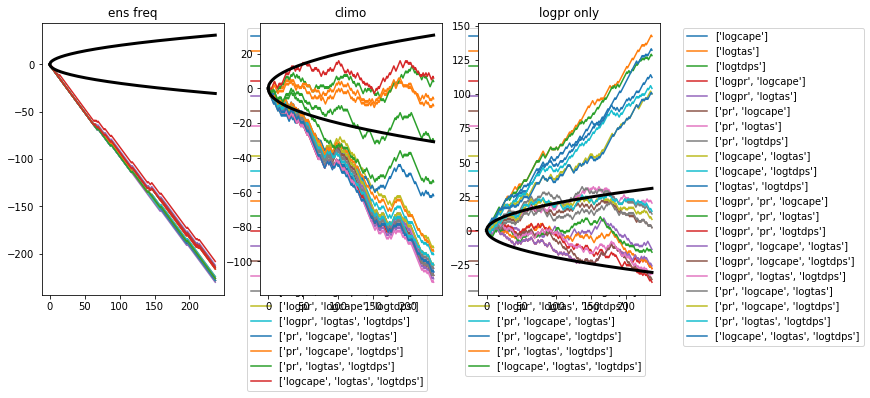

In [134]:
# calculate ensemble frequencym so I caclculate the observed probability along all ensemble members
ds_merged_M01 = (ds_merged_allM.pr>X_trainT.quantile(threshold_perc).apcp_rep).mean('M').compute()
df_merged_M01 = ds_merged_M01.to_dataframe()
df_merged_M01 = df_merged_M01.reset_index()
ens_freq = df_merged_M01.loc[:, df_merged_M01.columns == 'pr']
if randpick==1:
    X_trainT['ens_freq'] = ens_freq.loc[picktrain]
    X_testT['ens_freq'] = ens_freq.loc[picktest]
elif randpick==0:
    X_trainT['ens_freq'] = ens_freq[0:int(ens_freq.shape[0]/2)].astype(int)
    X_testT['ens_freq'] = ens_freq[int(ens_freq.shape[0]/2):].astype(int)

REAL = y_testT
# Generate empty dataframe to put the reference values which I will use for the randomwalk plots
# this needs to be the TEST segment of the data

Prediction_test_rw = X_testT[['ens_freq']]*1.
Prediction_test_rw['climo_only'] = X_testT[['climo_precip']]*1
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,4,1)
ax2 = plt.subplot(1,4,2)


# all combinations of all models
v1 = ['const']
# varnamesall = ['logpr','pr', 'tas', 'tdps', 'cape', 'logcape', 'logtas', 'logtdps']
varnamesall = ['logpr','pr', 'logcape', 'logtas', 'logtdps']
l1 = list(combinations(varnamesall,1))
l2 = list(combinations(varnamesall,2))
l3 = list(combinations(varnamesall,3))
lall = l1+l2+l3
ROCAUC = 0.
ROCAUCpar = list()
for iname in lall:
    print(iname)
    v2=v1+list(iname)
    X_train = X_trainT[v2]
    X_test = X_testT[v2]
    logit_model=sm.Logit(y_trainT,X_train)
#     model = LogisticRegression(C=1e8)
    if (iname!=('logpr','pr'))&(iname!=('logcape','cape'))&(iname!=('logtas','tas')):
        try:
            result1=logit_model.fit(disp=0,maxiter=100)
            predictions = result1.predict(X_test)
            ROCAUC1 = roc_auc_score(y_testT[np.isfinite(predictions.values)], predictions.values[np.isfinite(predictions.values)])
    #         print(predictions.values[np.isfinite(predictions.values)==0])
    #         print(ROCAUC1)
            if ROCAUC1>ROCAUC:
                ROCAUC=ROCAUC1*1.
                ROCAUCpar = list(v2)
                
            PREDICTION_B = predictions*1.
            random_walk_mike_map(X_testT[['T']],REAL, Prediction_test_rw['ens_freq'], 
                                     PREDICTION_B ,'ens freq',v2[1:], ax1)
            random_walk_mike_map(X_testT[['T']],REAL, Prediction_test_rw['climo_only'], 
                                     PREDICTION_B ,'climo',v2[1:], ax2)
            if iname==('logpr',):
    #             print('PROVA')
                Prediction_test_rw['logpr_only'] = predictions*1.
                ax3 = plt.subplot(1,4,3)
            elif iname==('pr',):
    #             print('PROVA')
                Prediction_test_rw['pr_only'] = predictions*1.
                ax4 = plt.subplot(1,4,4)
            
            
            
            if iname!=('logpr',):
                PREDICTION_B = predictions*1.
#                 random_walk_mike_map_BSS(X_testT[['T']],REAL, Prediction_test_rw['logpr_only'], 
#                                          PREDICTION_B,X_testT['climo_precip'] ,'logpr only',v2[1:])
                random_walk_mike_map(X_testT[['T']],REAL, Prediction_test_rw['logpr_only'], 
                                         PREDICTION_B ,'logpr only',v2[1:], ax3)
            if iname!=('pr',):
                PREDICTION_B = predictions*1.
#                 random_walk_mike_map_BSS(X_testT[['T']],REAL, Prediction_test_rw['logpr_only'], 
#                                          PREDICTION_B,X_testT['climo_precip'] ,'logpr only',v2[1:])
                random_walk_mike_map(X_testT[['T']],REAL, Prediction_test_rw['pr_only'], 
                                         PREDICTION_B ,'pr only',v2[1:], ax4)
    
        except:
            print('error')
print(ROCAUC)
print(ROCAUCpar)
NN = len(pd.unique(X_testT[['T']].values[:,0]))
for ax in (ax1,ax2, ax3, ax4):
    ax.plot(np.arange(0,NN),2.*(np.arange(0,NN))**(1/2.),'k-',lw=3)
    ax.plot(np.arange(0,NN),-2.*(np.arange(0,NN))**(1/2.),'k-',lw=3)

In [146]:
X_trainT.head()

,apcp_rep,pr,tas,tdps,cape,logpr,logcape,logtas,logtdps,T,const,climo_precip,ens_freq
1,0.177661,0.089383,302.152191,284.864960,759.519470,-2.414824,6.632686,5.710931,5.652015,1999-06-03 12:00:00,1,0.177661,0.181818
5,0.014252,0.026964,301.741943,291.389618,988.402710,-3.613242,6.896090,5.709572,5.674661,1999-06-03 12:00:00,1,0.014252,0.000000
6,0.044496,0.038539,301.917938,292.715607,1209.532349,-3.256085,7.097989,5.710155,5.679202,1999-06-03 12:00:00,1,0.044496,0.090909
7,0.072790,0.021331,301.581970,293.646729,1375.116943,-3.847586,7.226294,5.709042,5.682377,1999-06-03 12:00:00,1,0.072790,0.000000
11,0.266853,0.016737,302.924835,292.251984,1017.272705,-4.090133,6.924881,5.713485,5.677617,1999-06-03 12:00:00,1,0.266853,0.000000


In [151]:
# calculate climatology I start by copying the values as they are
X_trainT['climo_precip'] = X_trainT.apcp_rep*1.
X_testT['climo_precip'] = X_testT.apcp_rep*1.

# now substitute values per each month
GT = X_trainT.reset_index().set_index('T').groupby(pd.Grouper(freq='M'))

In [153]:
GT.climo_precip.transform(np.nanmean).reset_index()

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:3650: RuntimeWarning: Mean of empty slice
  wrapper = lambda x: func(x, *args, **kwargs)


,T,climo_precip
0,1999-06-03 12:00:00,0.541418
1,1999-06-03 12:00:00,0.541418
2,1999-06-03 12:00:00,0.541418
3,1999-06-03 12:00:00,0.541418
4,1999-06-03 12:00:00,0.541418
5,1999-06-03 12:00:00,0.541418
6,1999-06-03 12:00:00,0.541418
7,1999-06-03 12:00:00,0.541418
8,1999-06-03 12:00:00,0.541418
9,1999-06-03 12:00:00,0.541418


In [142]:
for k, v in  X_trainT.reset_index().set_index('T').groupby(pd.Grouper(freq='M')).indices.items():
#     media = np.nanmean( X_trainT['apcp_rep'].iloc[v].values)
    media = np.nanmean( y_trainT.iloc[v].values)
    X_trainT['climo_precip'].iloc[v] =media
    del media

for k, v in  X_testT.reset_index().set_index('T').groupby(pd.Grouper(freq='M')).indices.items():
#     media = np.nanmean( X_testT['apcp_rep'].iloc[v].values)
    media = np.nanmean( y_testT.iloc[v].values)
    print(X_testT[['climo_precip','T']].iloc[v])
    
    X_testT['climo_precip'].iloc[v] = media
    del media

     climo_precip                   T
131      0.184179 1999-06-03 12:00:00
135      0.219020 1999-06-03 12:00:00
136      0.376103 1999-06-03 12:00:00
137      0.654731 1999-06-03 12:00:00
139      0.622992 1999-06-03 12:00:00
140      0.199455 1999-06-03 12:00:00
142      0.208100 1999-06-03 12:00:00
143      0.080931 1999-06-03 12:00:00
144      0.779208 1999-06-03 12:00:00
146      0.757012 1999-06-03 12:00:00
147      0.577323 1999-06-03 12:00:00
148      0.563143 1999-06-03 12:00:00
149      0.593982 1999-06-03 12:00:00
151      0.871409 1999-06-03 12:00:00
152      0.754916 1999-06-03 12:00:00
155      0.492387 1999-06-10 12:00:00
157      0.399819 1999-06-10 12:00:00
160      0.369093 1999-06-10 12:00:00
163      0.614117 1999-06-10 12:00:00
166      0.657923 1999-06-10 12:00:00
169      0.800396 1999-06-10 12:00:00
172      0.939274 1999-06-10 12:00:00
174      0.273870 1999-06-10 12:00:00
176      0.583487 1999-06-10 12:00:00
180      0.528723 1999-06-10 12:00:00
181      0.6

      climo_precip                   T
3317      0.348320 2000-08-03 12:00:00
3318      0.086680 2000-08-03 12:00:00
3320      0.189916 2000-08-03 12:00:00
3321      0.044804 2000-08-03 12:00:00
3323      0.030100 2000-08-03 12:00:00
3325      0.102003 2000-08-03 12:00:00
3326      0.072245 2000-08-03 12:00:00
3327      0.162968 2000-08-03 12:00:00
3334      0.069784 2000-08-03 12:00:00
3335      0.076775 2000-08-03 12:00:00
3336      0.083289 2000-08-03 12:00:00
3338      0.073174 2000-08-03 12:00:00
3344      0.976793 2000-08-03 12:00:00
3348      0.091731 2000-08-03 12:00:00
3349      0.087866 2000-08-03 12:00:00
3353      0.111962 2000-08-03 12:00:00
3354      0.240326 2000-08-03 12:00:00
3356      0.834992 2000-08-03 12:00:00
3358      0.733924 2000-08-03 12:00:00
3359      0.659302 2000-08-03 12:00:00
3360      0.185824 2000-08-03 12:00:00
3361      0.240667 2000-08-03 12:00:00
3362      0.117294 2000-08-03 12:00:00
3363      0.018630 2000-08-03 12:00:00
3365      0.005788 2000-0

      climo_precip                   T
6066      0.157261 2002-06-06 12:00:00
6073      0.655685 2002-06-06 12:00:00
6074      0.653509 2002-06-06 12:00:00
6076      0.067673 2002-06-06 12:00:00
6080      0.269334 2002-06-06 12:00:00
6082      0.567888 2002-06-06 12:00:00
6084      0.946254 2002-06-06 12:00:00
6088      0.784424 2002-06-06 12:00:00
6089      0.792222 2002-06-06 12:00:00
6090      0.026495 2002-06-06 12:00:00
6092      0.263904 2002-06-06 12:00:00
6095      0.363260 2002-06-06 12:00:00
6096      0.518403 2002-06-06 12:00:00
6098      1.091734 2002-06-06 12:00:00
6099      0.984019 2002-06-06 12:00:00
6102      0.775356 2002-06-06 12:00:00
6104      0.180713 2002-06-06 12:00:00
6105      0.135707 2002-06-06 12:00:00
6109      0.441023 2002-06-06 12:00:00
6113      0.984706 2002-06-06 12:00:00
6114      1.159214 2002-06-06 12:00:00
6115      1.099993 2002-06-06 12:00:00
6120      0.126657 2002-06-06 12:00:00
6121      0.197614 2002-06-06 12:00:00
6122      0.296507 2002-0

       climo_precip                   T
10070      0.175614 2004-06-03 12:00:00
10073      0.465281 2004-06-03 12:00:00
10074      0.248701 2004-06-03 12:00:00
10075      0.172128 2004-06-03 12:00:00
10076      0.205454 2004-06-03 12:00:00
10077      0.225641 2004-06-03 12:00:00
10080      0.152568 2004-06-03 12:00:00
10081      0.142448 2004-06-03 12:00:00
10088      0.249818 2004-06-03 12:00:00
10092      0.286467 2004-06-03 12:00:00
10093      0.178556 2004-06-03 12:00:00
10095      0.200075 2004-06-03 12:00:00
10097      0.168135 2004-06-03 12:00:00
10098      0.236146 2004-06-03 12:00:00
10100      0.155777 2004-06-03 12:00:00
10101      0.372376 2004-06-03 12:00:00
10103      0.429589 2004-06-03 12:00:00
10104      0.601101 2004-06-03 12:00:00
10108      0.239605 2004-06-03 12:00:00
10111      0.191456 2004-06-03 12:00:00
10112      0.216234 2004-06-03 12:00:00
10113      0.312330 2004-06-03 12:00:00
10115      0.296888 2004-06-03 12:00:00
10117      0.358983 2004-06-03 12:00:00


       climo_precip                   T
13454      0.153216 2005-08-04 12:00:00
13455      0.149589 2005-08-04 12:00:00
13456      0.244469 2005-08-04 12:00:00
13457      0.238291 2005-08-04 12:00:00
13458      0.289346 2005-08-04 12:00:00
13459      0.361266 2005-08-04 12:00:00
13462      0.323054 2005-08-04 12:00:00
13463      0.609079 2005-08-04 12:00:00
13464      0.524919 2005-08-04 12:00:00
13466      0.141498 2005-08-04 12:00:00
13470      0.170624 2005-08-04 12:00:00
13472      0.310245 2005-08-04 12:00:00
13476      0.102309 2005-08-04 12:00:00
13477      0.410499 2005-08-04 12:00:00
13478      0.351722 2005-08-04 12:00:00
13479      0.691804 2005-08-04 12:00:00
13480      0.460303 2005-08-04 12:00:00
13481      0.281941 2005-08-04 12:00:00
13482      0.080695 2005-08-04 12:00:00
13483      0.139513 2005-08-04 12:00:00
13484      0.230004 2005-08-04 12:00:00
13488      0.206392 2005-08-04 12:00:00
13490      0.298654 2005-08-04 12:00:00
13491      0.261475 2005-08-04 12:00:00


       climo_precip                   T
15442      0.236776 2006-08-03 12:00:00
15443      0.346163 2006-08-03 12:00:00
15444      0.363380 2006-08-03 12:00:00
15445      0.202341 2006-08-03 12:00:00
15446      0.142999 2006-08-03 12:00:00
15447      0.156247 2006-08-03 12:00:00
15449      0.225905 2006-08-03 12:00:00
15451      0.315854 2006-08-03 12:00:00
15453      0.182492 2006-08-03 12:00:00
15457      0.267212 2006-08-03 12:00:00
15458      0.398462 2006-08-03 12:00:00
15459      0.345883 2006-08-03 12:00:00
15460      0.150102 2006-08-03 12:00:00
15461      0.245212 2006-08-03 12:00:00
15462      0.215245 2006-08-03 12:00:00
15463      0.147467 2006-08-03 12:00:00
15465      0.454137 2006-08-03 12:00:00
15469      0.228666 2006-08-03 12:00:00
15471      0.114154 2006-08-03 12:00:00
15472      0.244844 2006-08-03 12:00:00
15474      0.518177 2006-08-03 12:00:00
15475      0.281261 2006-08-03 12:00:00
15476      0.064802 2006-08-03 12:00:00
15478      0.045854 2006-08-03 12:00:00


       climo_precip                   T
18824      0.128145 2008-07-03 12:00:00
18826      0.255149 2008-07-03 12:00:00
18827      0.399399 2008-07-03 12:00:00
18828      0.462269 2008-07-03 12:00:00
18829      0.374188 2008-07-03 12:00:00
18830      0.780238 2008-07-03 12:00:00
18831      0.293294 2008-07-03 12:00:00
18832      0.285916 2008-07-03 12:00:00
18837      0.247654 2008-07-03 12:00:00
18838      0.153739 2008-07-03 12:00:00
18839      0.514939 2008-07-03 12:00:00
18840      0.867927 2008-07-03 12:00:00
18841      0.836153 2008-07-03 12:00:00
18844      0.971618 2008-07-03 12:00:00
18846      0.723326 2008-07-03 12:00:00
18849      0.418485 2008-07-03 12:00:00
18852      1.153348 2008-07-03 12:00:00
18856      0.780092 2008-07-03 12:00:00
18857      0.205538 2008-07-03 12:00:00
18861      0.432524 2008-07-03 12:00:00
18863      0.758370 2008-07-03 12:00:00
18864      0.448033 2008-07-03 12:00:00
18866      0.656864 2008-07-03 12:00:00
18868      1.139912 2008-07-03 12:00:00


       climo_precip                   T
21576      0.119661 2009-08-06 12:00:00
21578      0.147093 2009-08-06 12:00:00
21581      0.052316 2009-08-06 12:00:00
21582      0.121931 2009-08-06 12:00:00
21583      0.303200 2009-08-06 12:00:00
21587      0.087485 2009-08-06 12:00:00
21588      0.108058 2009-08-06 12:00:00
21591      0.157982 2009-08-06 12:00:00
21596      0.566457 2009-08-06 12:00:00
21599      0.011952 2009-08-06 12:00:00
21600      0.007711 2009-08-06 12:00:00
21603      0.297945 2009-08-06 12:00:00
21604      0.350974 2009-08-06 12:00:00
21607      0.253934 2009-08-06 12:00:00
21608      0.496683 2009-08-06 12:00:00
21610      0.580441 2009-08-06 12:00:00
21611      0.294283 2009-08-06 12:00:00
21615      0.081396 2009-08-06 12:00:00
21616      0.103872 2009-08-06 12:00:00
21618      0.418862 2009-08-06 12:00:00
21620      0.144997 2009-08-06 12:00:00
21621      0.667146 2009-08-06 12:00:00
21625      0.461130 2009-08-06 12:00:00
21627      0.276367 2009-08-06 12:00:00


       climo_precip                   T
24960      0.241208 2011-07-07 12:00:00
24961      0.572532 2011-07-07 12:00:00
24962      0.106570 2011-07-07 12:00:00
24965      0.036997 2011-07-07 12:00:00
24966      0.039410 2011-07-07 12:00:00
24967      0.025662 2011-07-07 12:00:00
24968      0.004941 2011-07-07 12:00:00
24969      0.000902 2011-07-07 12:00:00
24971      0.003298 2011-07-07 12:00:00
24974      0.111957 2011-07-07 12:00:00
24980      0.062766 2011-07-07 12:00:00
24984      0.051319 2011-07-07 12:00:00
24986      0.086120 2011-07-07 12:00:00
24988      0.271210 2011-07-07 12:00:00
24989      0.321294 2011-07-07 12:00:00
24991      0.110767 2011-07-07 12:00:00
24992      0.224435 2011-07-07 12:00:00
24993      0.175080 2011-07-07 12:00:00
24996      0.116533 2011-07-07 12:00:00
24997      0.058459 2011-07-07 12:00:00
24999      0.168535 2011-07-07 12:00:00
25001      0.344224 2011-07-07 12:00:00
25003      0.348102 2011-07-07 12:00:00
25007      0.047362 2011-07-07 12:00:00


       climo_precip                   T
26958      1.152090 2012-07-05 12:00:00
26962      1.102274 2012-07-05 12:00:00
26963      1.302058 2012-07-05 12:00:00
26965      0.338939 2012-07-05 12:00:00
26966      0.231659 2012-07-05 12:00:00
26967      0.466474 2012-07-05 12:00:00
26968      0.222109 2012-07-05 12:00:00
26969      0.234652 2012-07-05 12:00:00
26971      0.715397 2012-07-05 12:00:00
26972      0.983075 2012-07-05 12:00:00
26975      1.406090 2012-07-05 12:00:00
26978      0.341319 2012-07-05 12:00:00
26980      0.298180 2012-07-05 12:00:00
26982      0.339530 2012-07-05 12:00:00
26983      0.217544 2012-07-05 12:00:00
26984      0.271417 2012-07-05 12:00:00
26985      0.891449 2012-07-05 12:00:00
26988      0.930815 2012-07-05 12:00:00
26990      0.671341 2012-07-05 12:00:00
26991      1.148981 2012-07-05 12:00:00
26993      0.240679 2012-07-05 12:00:00
26994      0.313588 2012-07-05 12:00:00
26995      0.358122 2012-07-05 12:00:00
26998      0.203143 2012-07-05 12:00:00


       climo_precip                   T
29573      0.036147 2013-08-01 12:00:00
29574      0.019118 2013-08-01 12:00:00
29575      0.002763 2013-08-01 12:00:00
29576      0.103486 2013-08-01 12:00:00
29578      0.003388 2013-08-01 12:00:00
29585      0.029488 2013-08-01 12:00:00
29588      0.004935 2013-08-01 12:00:00
29589      0.009896 2013-08-01 12:00:00
29590      0.038990 2013-08-01 12:00:00
29591      0.006899 2013-08-01 12:00:00
29592      0.001103 2013-08-01 12:00:00
29600      0.001061 2013-08-01 12:00:00
29601      0.000559 2013-08-01 12:00:00
29603      0.002749 2013-08-01 12:00:00
29604      0.000821 2013-08-01 12:00:00
29607      0.042912 2013-08-01 12:00:00
29609      0.218201 2013-08-01 12:00:00
29610      0.266932 2013-08-01 12:00:00
29611      0.142177 2013-08-01 12:00:00
29612      0.078285 2013-08-01 12:00:00
29616      0.001850 2013-08-01 12:00:00
29618      0.036971 2013-08-01 12:00:00
29621      0.320461 2013-08-01 12:00:00
29623      0.315605 2013-08-01 12:00:00


       climo_precip                   T
32958      0.995873 2015-07-02 12:00:00
32960      2.072995 2015-07-02 12:00:00
32963      0.042427 2015-07-02 12:00:00
32965      0.292064 2015-07-02 12:00:00
32968      0.911574 2015-07-02 12:00:00
32971      0.703357 2015-07-02 12:00:00
32973      1.214576 2015-07-02 12:00:00
32974      1.507629 2015-07-02 12:00:00
32976      0.381537 2015-07-02 12:00:00
32977      0.234154 2015-07-02 12:00:00
32983      0.837111 2015-07-02 12:00:00
32985      0.679327 2015-07-02 12:00:00
32986      0.950974 2015-07-02 12:00:00
32988      0.754787 2015-07-02 12:00:00
32989      1.269812 2015-07-02 12:00:00
32992      0.959638 2015-07-02 12:00:00
32993      1.525107 2015-07-02 12:00:00
32995      1.156323 2015-07-02 12:00:00
32996      0.878241 2015-07-02 12:00:00
32997      1.293838 2015-07-02 12:00:00
33000      0.880855 2015-07-02 12:00:00
33001      0.970962 2015-07-02 12:00:00
33003      1.193319 2015-07-02 12:00:00
33005      2.355488 2015-07-02 12:00:00


       climo_precip                   T
36344      0.272064 2016-09-01 12:00:00
36346      0.226032 2016-09-01 12:00:00
36348      0.209988 2016-09-01 12:00:00
36349      0.083867 2016-09-01 12:00:00
36350      0.103059 2016-09-01 12:00:00
36354      0.257332 2016-09-01 12:00:00
36355      0.487754 2016-09-01 12:00:00
36357      0.348027 2016-09-01 12:00:00
36358      0.322855 2016-09-01 12:00:00
36359      0.192077 2016-09-01 12:00:00
36361      0.245908 2016-09-01 12:00:00
36363      0.178484 2016-09-01 12:00:00
36364      0.127992 2016-09-01 12:00:00
36366      0.127248 2016-09-01 12:00:00
36373      0.633231 2016-09-01 12:00:00
36374      0.207632 2016-09-01 12:00:00
36375      0.089549 2016-09-01 12:00:00
36377      0.305812 2016-09-01 12:00:00
36379      0.320189 2016-09-01 12:00:00
36380      0.361190 2016-09-01 12:00:00
36383      0.024042 2016-09-01 12:00:00
36384      0.029996 2016-09-01 12:00:00
36385      0.007916 2016-09-01 12:00:00
36387      0.563880 2016-09-01 12:00:00


In [144]:
X_trainT.keys()

Index(['apcp_rep', 'pr', 'tas', 'tdps', 'cape', 'logpr', 'logcape', 'logtas',
       'logtdps', 'T', 'const', 'climo_precip', 'ens_freq'],
      dtype='object')

In [145]:
X_testT.keys()

Index(['apcp_rep', 'pr', 'tas', 'tdps', 'cape', 'logpr', 'logcape', 'logtas',
       'logtdps', 'T', 'const', 'climo_precip', 'ens_freq'],
      dtype='object')

In [143]:
print(X_trainT[['climo_precip','T']][0:60])
print(X_testT[['climo_precip','T']][0:60])

     climo_precip                   T
1        0.177661 1999-06-03 12:00:00
5        0.014252 1999-06-03 12:00:00
6        0.044496 1999-06-03 12:00:00
7        0.072790 1999-06-03 12:00:00
11       0.266853 1999-06-03 12:00:00
12       0.140640 1999-06-03 12:00:00
19       0.149566 1999-06-03 12:00:00
20       0.044616 1999-06-03 12:00:00
22       0.033408 1999-06-03 12:00:00
23       0.020174 1999-06-03 12:00:00
24       0.075790 1999-06-03 12:00:00
29       0.324037 1999-06-03 12:00:00
31       0.120842 1999-06-03 12:00:00
32       0.258072 1999-06-03 12:00:00
33       0.230617 1999-06-03 12:00:00
36       0.014191 1999-06-03 12:00:00
37       0.052692 1999-06-03 12:00:00
40       0.115209 1999-06-03 12:00:00
42       0.368528 1999-06-03 12:00:00
43       0.409683 1999-06-03 12:00:00
45       0.197812 1999-06-03 12:00:00
46       0.165064 1999-06-03 12:00:00
48       0.175118 1999-06-03 12:00:00
49       0.044706 1999-06-03 12:00:00
50       0.025036 1999-06-03 12:00:00
52       0.0

# Comparing monthly average prob>0.85 with the one from the forecast

In [136]:
Prediction_test_rw['T']=X_testT[['T']]
Prediction_test_rw

,ens_freq,climo_only,logpr_only,T
0,0.272727,0.037341,0.025596,1999-06-03 12:00:00
2,0.272727,0.322088,0.025066,1999-06-03 12:00:00
3,0.272727,0.454268,0.019915,1999-06-03 12:00:00
4,0.090909,0.267235,0.008359,1999-06-03 12:00:00
8,0.000000,0.081803,0.002420,1999-06-03 12:00:00
9,0.000000,0.065089,0.002504,1999-06-03 12:00:00
10,0.000000,0.174320,0.002157,1999-06-03 12:00:00
13,0.545455,0.090912,0.059124,1999-06-03 12:00:00
14,0.272727,0.247062,0.017006,1999-06-03 12:00:00
15,0.272727,0.460825,0.026097,1999-06-03 12:00:00


0.7043988269794721
0.5238095238095238
0.41325115562403697
0.591336563123397
0.48494983277591974
0.2771675625146062
0.560064935064935
0.44285296696872267
0.639320029563932
0.6006591595715463
0.5104226983207876
0.5128088868737247
0.750975097509751
0.4564247122386657
0.5387618516452873
0.7960772104607721
0.6882424242424243
0.7210807768083309
0.5884168051269878
0.5225705329153606
0.6779560308972074
0.28409090909090906
0.6561264822134387
0.4627301958491669
0.6416129801956573
0.6976674641148325
0.5795074490726664
0.4280195724954931
0.6973461321287407
0.5280675608544461
0.744831492495044
0.595120534417659
0.7452184179456905
0.5483776673487284
0.6176798661461238
0.6334699782975645
0.5652302243211335
0.5631929046563193
0.5412587412587413
0.6632775119617226
0.34231200897867564
0.5279609979925437
0.5409836065573771
0.712161189733749
0.6363636363636364
0.6461675579322637
0.5375494071146245
0.8070175438596491
0.6255980861244019
0.7070707070707072
0.787878787878788
0.6578764746703677
0.5007261109497

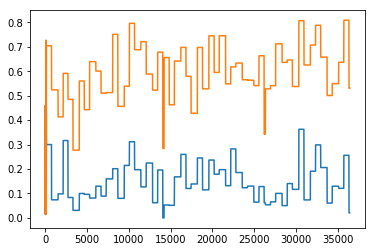

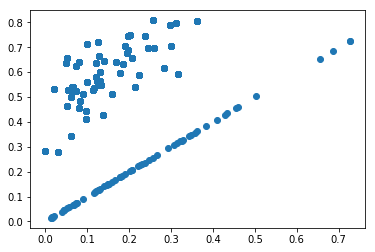

In [128]:
X_testT.climo_precip.plot()
X_testT['ens_freq_Mon_mean'] = X_testT['climo_precip']*1.
for k, v in  X_testT.reset_index().set_index('T').groupby(pd.Grouper(freq='M')).indices.items():
    media = np.nanmean( X_testT['ens_freq'].iloc[v].values)
    print(media)
#     media = np.nanmean( y_trainT.iloc[v].values)
    X_testT['ens_freq_Mon_mean'].iloc[v] =media
    del media

X_testT.ens_freq_Mon_mean.plot()
plt.figure()
plt.plot(X_testT.climo_precip,X_testT.ens_freq_Mon_mean,'o')


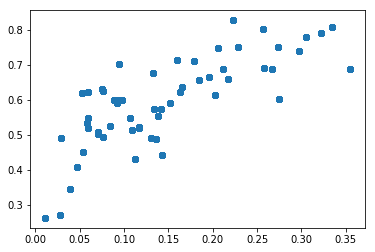

In [122]:
X_trainT.climo_precip.plot()
X_trainT['ens_freq_Mon_mean'] = X_trainT['climo_precip']*1.
for k, v in  X_trainT.reset_index().set_index('T').groupby(pd.Grouper(freq='M')).indices.items():
    media = np.nanmean( X_trainT['ens_freq'].iloc[v].values)
#     media = np.nanmean( y_trainT.iloc[v].values)
    X_trainT['ens_freq_Mon_mean'].iloc[v] =media
    del media

X_trainT.ens_freq_Mon_mean.plot()
plt.figure()
plt.plot(X_trainT.climo_precip,X_trainT.ens_freq_Mon_mean,'o')


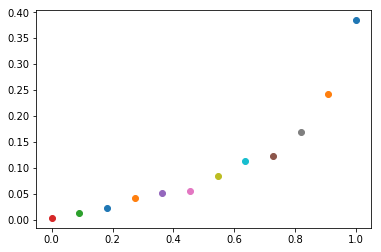

In [64]:
for iu in X_trainT.ens_freq_train.unique():
    plt.plot(iu,y_trainT[X_trainT.ens_freq_train==iu].mean(),'o')

1.1367290019989014 0.7137482076883317
Optimization terminated successfully.
         Current function value: 0.159185
         Iterations 8
             precision    recall  f1-score   support

          0      0.953     0.994     0.973     17336
          1      0.359     0.067     0.113       913

avg / total      0.923     0.947     0.930     18249

[[17227   109]
 [  852    61]]
0.5302626055676328
Optimization terminated successfully.
         Current function value: 0.193488
         Iterations 7
             precision    recall  f1-score   support

          0      0.950     1.000     0.974     17336
          1      0.000     0.000     0.000       913

avg / total      0.902     0.950     0.926     18249

[[17336     0]
 [  913     0]]
0.5


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

Optimization terminated successfully.
         Current function value: 0.187641
         Iterations 7
             precision    recall  f1-score   support

          0      0.950     1.000     0.974     17336
          1      0.000     0.000     0.000       913

avg / total      0.902     0.950     0.926     18249

[[17336     0]
 [  913     0]]
0.5


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Optimization terminated successfully.
         Current function value: 0.185960
         Iterations 8
             precision    recall  f1-score   support

          0      0.950     1.000     0.974     17336
          1      0.000     0.000     0.000       913

avg / total      0.902     0.950     0.926     18249

[[17336     0]
 [  913     0]]
0.5


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Optimization terminated successfully.
         Current function value: 0.159065
         Iterations 8
             precision    recall  f1-score   support

          0      0.953     0.994     0.973     17336
          1      0.360     0.069     0.116       913

avg / total      0.923     0.947     0.930     18249

[[17224   112]
 [  850    63]]
0.5312713706695725
Optimization terminated successfully.
         Current function value: 0.157291
         Iterations 8
             precision    recall  f1-score   support

          0      0.953     0.994     0.973     17336
          1      0.362     0.064     0.108       913

avg / total      0.923     0.948     0.930     18249

[[17234   102]
 [  855    58]]
0.5288215622063704
Optimization terminated successfully.
         Current function value: 0.156574
         Iterations 8
             precision    recall  f1-score   support

          0      0.953     0.994     0.973     17336
          1      0.375     0.072     0.121       913

avg

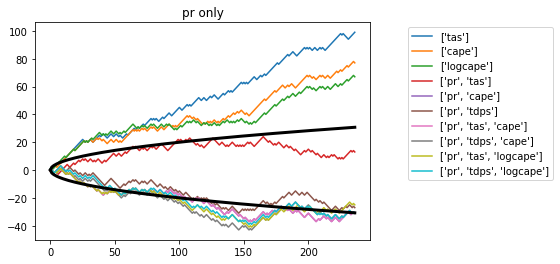

In [656]:



varname = ['const','pr']
X_train = X_trainT[varname]
X_test = X_testT[varname]
logit_model=sm.Logit(y_trainT,X_train)
model = LogisticRegression(C=1e8)
result1=logit_model.fit()
# print(result1.summary2())
predictions = result1.predict(X_test)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(classification_report(y_testT, predictions_nominal, digits=3))
# print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_A = predictions*1.

varname = ['const','tas']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
# print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.
plt.figure()
random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname = ['const','cape']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
# print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.

random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname = ['const','logcape']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train,missing = 'drop')
result1=logit_model.fit(missing = 'drop')
# print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.

random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tas'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
# print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.

random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','cape'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
# print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tdps'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
# print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.

random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tas','cape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
# print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tdps','cape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
# print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tas','logcape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
# print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tdps','logcape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
# print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

NN = len(pd.unique(X_testT[['T']].values[:,0]))
plt.plot(np.arange(0,NN),2.*(np.arange(0,NN))**(1/2.),'k-',lw=3)
plt.plot(np.arange(0,NN),-2.*(np.arange(0,NN))**(1/2.),'k-',lw=3)

['pr']
[[3.43987819]]
[-3.13691696]
liblinear
Accuracy of logistic regression classifier on test set: 0.86
log loss: 0.3439
0.5632873234697883


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


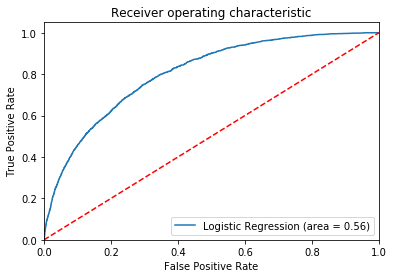

['pr', 'tas']
0
[[ 3.3915885  -0.01047124]]
[0.02319605]
Accuracy of logistic regression classifier on test set: 0.86
log loss: 0.3441
0.5626868956001474


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


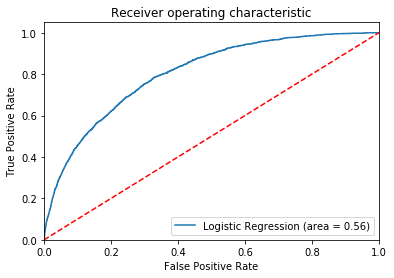

['pr', 'tdps']
0
[[ 3.46466301 -0.01046647]]
[-0.11380592]
Accuracy of logistic regression classifier on test set: 0.86
log loss: 0.3447
0.5633139166384875


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


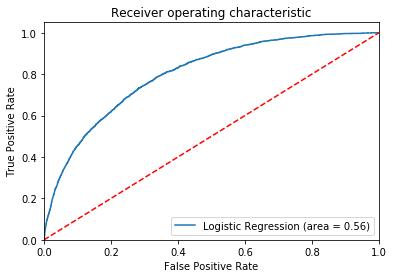

['pr', 'cape']
0
[[3.15798993e+00 7.17860445e-04]]
[-3.53863761]
Accuracy of logistic regression classifier on test set: 0.86
log loss: 0.3396
0.56715701184543


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


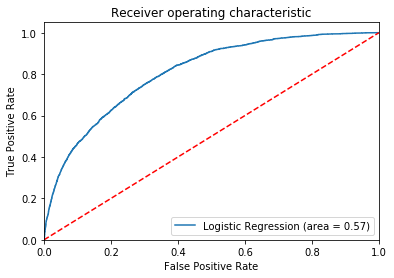

['pr', 'logcape']
0
[[3.19255448 0.48800558]]
[-6.17696601]
Accuracy of logistic regression classifier on test set: 0.86
log loss: 0.3384
0.5661401842320353


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


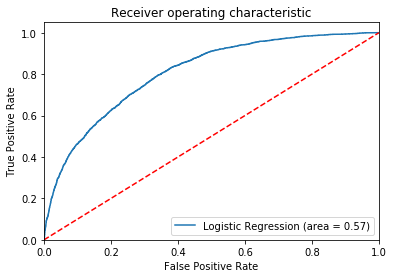

['pr', 'tas', 'cape']
0
[[ 3.10805138e+00 -1.19660476e-02  7.52307151e-04]]
[0.04211291]
Accuracy of logistic regression classifier on test set: 0.86
log loss: 0.3397
0.5655772246927343


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


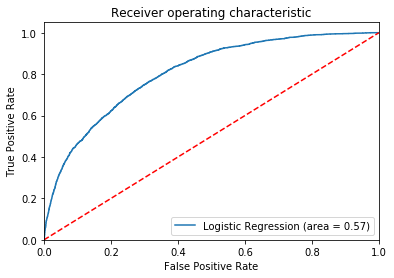

['pr', 'tdps', 'cape']
0
[[ 3.18392479e+00 -1.22768048e-02  7.82510421e-04]]
[-0.04158653]
Accuracy of logistic regression classifier on test set: 0.86
log loss: 0.3397
0.5671542930550197


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


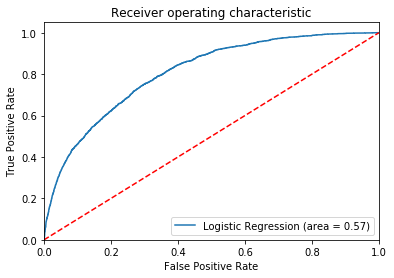

In [474]:


y_test = y_testT
y_train  =y_trainT


varname=['pr' ]   
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
# logreg = LogisticRegression()
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.coef_)
print(logreg.intercept_)
print(logreg.solver)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tas'    ] 
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)
print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tdps'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','cape'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


varname=['pr','logcape'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tas' ,'cape'   ] 
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)
print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tdps','cape'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [396]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
X_trainT, X_testT, y_trainT, y_testT = train_test_split(Xm, ym, test_size=0.5, random_state=0)

# whichytest = y_testT.index
# df_merged_test = df_merged_mean.loc[whichytest]
# ds_merged_test = df_merged_test.set_index(['M','T']).to_xarray().mean('M')
# del df_merged_test
# df_merged_test = ds_merged_test.to_dataframe()
# df_merged_test = df_merged_test.reset_index()
# df_merged_test['y']=df_merged_test.apcp_rep>=quantile_threshold_mean.values
# X_testT = df_merged_test[['pr','tas','tdps','cape','logcape']]
# y_testT = df_merged_test.loc[:, df_merged_test.columns == 'y']
# X_testT['const']=1
# y_testT = y_testT.loc[X_testT.dropna().index]
# X_testT = X_testT.dropna()
y_testT = y_testT.astype(int)

varname = ['const','pr']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
model = LogisticRegression(C=1e8)

result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))

print(roc_auc_score(y_testT, predictions_nominal))

varname = ['const','tas']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

varname = ['const','cape']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

varname = ['const','logcape']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

varname=['const','pr','tas'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

varname=['const','pr','cape'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

varname=['const','pr','tdps'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

varname=['const','pr','tas','cape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

varname=['const','pr','tdps','cape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

Optimization terminated successfully.
         Current function value: 0.169433
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.589     
Dependent Variable: y                AIC:              43.9861   
Date:               2018-12-11 15:18 BIC:              49.5275   
No. Observations:   118              Log-Likelihood:   -19.993   
Df Model:           1                LL-Null:          -48.649   
Df Residuals:       116              LLR p-value:      3.7191e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025     0.975]
-------------------------------------------------------------------
const    -8.8198     1.9977   -4.4150   0.0000   -12.7352   -4.9044
pr       17.7939     4.3477    4.0927   0.0000     9.2725 

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.619     
Dependent Variable: y                AIC:              45.0334   
Date:               2018-12-11 15:18 BIC:              56.1162   
No. Observations:   118              Log-Likelihood:   -18.517   
Df Model:           3                LL-Null:          -48.649   
Df Residuals:       114              LLR p-value:      5.1610e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
------------------------------------------------------------------
            Coef.    Std.Err.     z     P>|z|     [0.025    0.975]
------------------------------------------------------------------
const     -123.9128  102.0465  -1.2143  0.2246  -323.9203  76.0947
pr          21.8067    6.0279   3.6176  0.0003     9.9923  33.6212
tas          0.3724    0.3337   1.1159  0.2644    -0.2816   1.0263
cape         0.0023    0.0018 

0.5589172273874283 0.7137482076883317
Optimization terminated successfully.
         Current function value: 0.158353
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.629     
Dependent Variable: apcp_rep         AIC:              41.3712   
Date:               2018-12-21 13:43 BIC:              46.9126   
No. Observations:   118              Log-Likelihood:   -18.686   
Df Model:           1                LL-Null:          -50.397   
Df Residuals:       116              LLR p-value:      1.6676e-15
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-------------------------------------------------------------------
         Coef.     Std.Err.      z      P>|z|     [0.025     0.975]
-------------------------------------------------------------------
const   -10.2769     2.5223   -4.0744   0.0000   -15.2205   -5.3332
pr       18.6057    

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.043   
Dependent Variable: apcp_rep         AIC:              100.4447
Date:               2018-12-21 13:43 BIC:              105.9860
No. Observations:   118              Log-Likelihood:   -48.222 
Df Model:           1                LL-Null:          -50.397 
Df Residuals:       116              LLR p-value:      0.037020
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|    [0.025    0.975]
----------------------------------------------------------------
const      -9.6976    4.2454  -2.2843  0.0224  -18.0183  -1.3769
logcape     1.2535    0.6567   1.9088  0.0563   -0.0336   2.5406

             precision    recall  f1-score   support

          0      0.849     1.000     0.918       101
          1     

Optimization terminated successfully.
         Current function value: 0.157682
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.631     
Dependent Variable: apcp_rep         AIC:              45.2130   
Date:               2018-12-21 13:43 BIC:              56.2958   
No. Observations:   118              Log-Likelihood:   -18.607   
Df Model:           3                LL-Null:          -50.397   
Df Residuals:       114              LLR p-value:      1.0088e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
------------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|     [0.025    0.975] 
------------------------------------------------------------------
const       0.8863  108.7022   0.0082  0.9935  -212.1661  213.9387
pr         18.9591    5.2588   3.6052  0.0003     8.6521   29

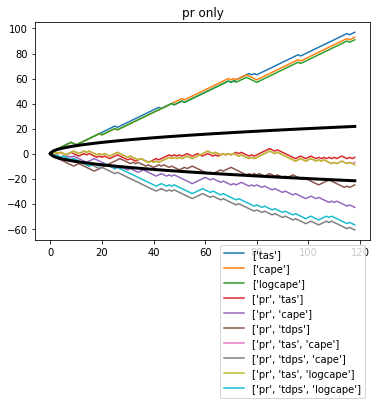

In [648]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
X_trainT, X_testT, y_trainT, y_testT = train_test_split(Xm, ym, test_size=0.5, random_state=0)
y_trainT = y_trainT.astype(int)
y_testT = y_testT.astype(int)


# X_trainT = Xm[int(Xm.shape[0]/2):]
# y_trainT = ym[int(Xm.shape[0]/2):].astype(int)
# X_testT = Xm[0:int(Xm.shape[0]/2)]
# y_testT = ym[0:int(Xm.shape[0]/2)].astype(int)

# X_trainT = Xm[0:int(Xm.shape[0]/2)]
# y_trainT = ym[0:int(Xm.shape[0]/2)].astype(int)
# X_testT = Xm[int(Xm.shape[0]/2):]
# y_testT = ym[int(Xm.shape[0]/2):].astype(int)

# X_trainT = Xm[0:int(Xm.shape[0])]
# y_trainT = ym[0:int(Xm.shape[0])].astype(int)
# X_testT = Xm[0:int(Xm.shape[0])]
# y_testT = ym[0:int(Xm.shape[0])].astype(int)

# whichytest = y_testT.index
# df_merged_test = df_merged.loc[whichytest]
# ds_merged_test = df_merged_test.set_index(['M','T','lat','lon']).to_xarray().mean('M')
# del df_merged_test
# df_merged_test = ds_merged_test.to_dataframe()
# df_merged_test = df_merged_test.reset_index()
# df_merged_test['y']=df_merged_test.apcp_rep>=quantile_threshold_all
# X_testT = df_merged_test[['pr','tas','tdps','cape','logcape']]
# y_testT = df_merged_test.loc[:, df_merged_test.columns == 'y']
# X_testT['const']=1
# y_testT = y_testT.loc[X_testT.dropna().index]
# X_testT = X_testT.dropna()
y_testT = y_testT.astype(int)


print(X_trainT.quantile(0.85).apcp_rep,quantile_threshold_all)

y_trainT=(X_trainT.apcp_rep>=X_trainT.quantile(0.85).apcp_rep).astype(int)
y_testT =(X_testT.apcp_rep>=X_testT.quantile(0.85).apcp_rep).astype(int)

REAL = y_testT

varname = ['const','pr']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
model = LogisticRegression(C=1e8)

result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))

print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_A = predictions*1.

varname = ['const','tas']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.
plt.figure()
random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname = ['const','cape']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname = ['const','logcape']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train,missing = 'drop')
result1=logit_model.fit(missing = 'drop')
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tas'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','cape'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tdps'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tas','cape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tdps','cape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tas','logcape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tdps','logcape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])
plt.plot(np.arange(0,len(REAL.values[:])),2.*(np.arange(0,len(REAL.values[:])))**(1/2.),'k-',lw=3)
plt.plot(np.arange(0,len(REAL.values[:])),-2.*(np.arange(0,len(REAL.values[:])))**(1/2.),'k-',lw=3)

In [479]:
Xm.shape

(237, 6)

['pr']
[[17.79063992]]
[-8.81824259]
liblinear
Accuracy of logistic regression classifier on test set: 0.87
log loss: 0.3368
0.818421052631579


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


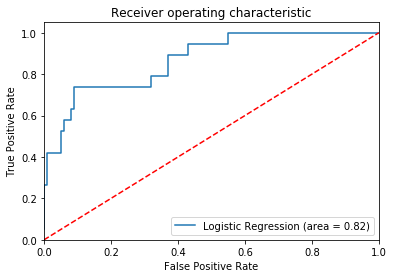

['pr', 'tas']
0
[[17.14695178 -0.02897474]]
[0.15937179]
Accuracy of logistic regression classifier on test set: 0.87
log loss: 0.3337
0.818421052631579


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


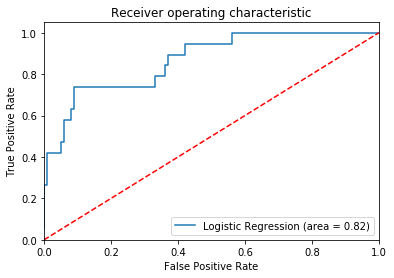

['pr', 'tdps']
0
[[17.52140899 -0.0296823 ]]
[-0.15557522]
Accuracy of logistic regression classifier on test set: 0.87
log loss: 0.3306
0.818421052631579


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


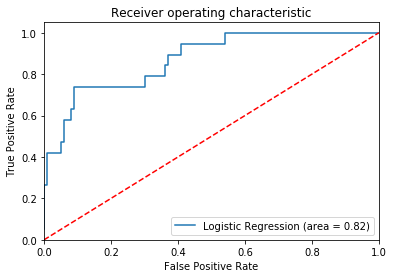

['pr', 'cape']
0
[[1.74136478e+01 2.07850332e-03]]
[-10.08789065]
Accuracy of logistic regression classifier on test set: 0.88
log loss: 0.3404
0.8234210526315789


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


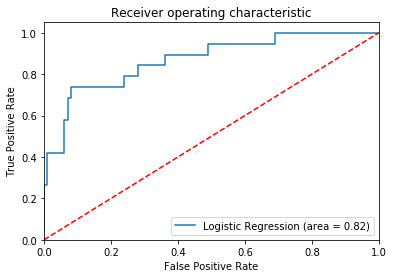

['pr', 'logcape']
0
[[18.23426348  1.5658396 ]]
[-19.17813596]
Accuracy of logistic regression classifier on test set: 0.88
log loss: 0.3508
0.8234210526315789


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


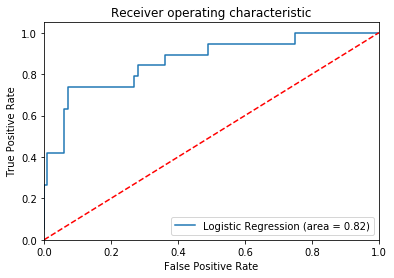

['pr', 'tas', 'cape']
0
[[ 1.70275760e+01 -3.38356771e-02  2.11181781e-03]]
[0.20157894]
Accuracy of logistic regression classifier on test set: 0.89
log loss: 0.3396
0.8284210526315791


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


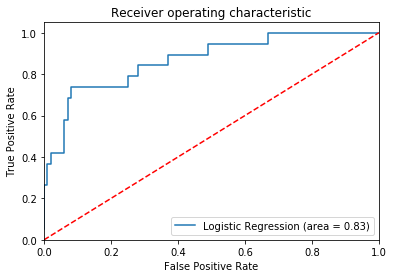

['pr', 'tdps', 'cape']
0
[[ 1.74723010e+01 -3.61197403e-02  2.26335296e-03]]
[0.14601483]
Accuracy of logistic regression classifier on test set: 0.89
log loss: 0.3364
0.8284210526315791


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


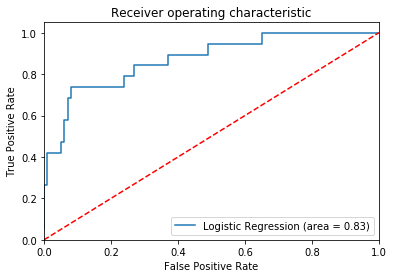

In [397]:


y_test = y_testT
y_train  =y_trainT


varname=['pr' ]   
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
# logreg = LogisticRegression()
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.coef_)
print(logreg.intercept_)
print(logreg.solver)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tas'    ] 
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)
print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tdps'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','cape'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','logcape'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tas' ,'cape'   ] 
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)
print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tdps','cape'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([2.92578916, 0.        , 0.73144729, 1.46289458, 2.19434187,
        0.73144729, 0.73144729, 0.        , 0.73144729, 1.46289458]),
 array([0.01629368, 0.10743719, 0.19858069, 0.28972419, 0.38086769,
        0.47201119, 0.56315469, 0.65429819, 0.74544169, 0.83658519,
        0.92772869]),
 <a list of 1 Patch objects>)

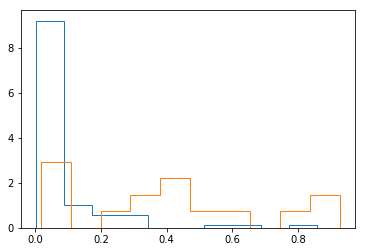

In [331]:
plt.hist(logreg.predict_proba(X_test)[:,1][np.asarray(y_test==0).squeeze()], histtype='step', normed=True)
plt.hist(logreg.predict_proba(X_test)[:,1][np.asarray(y_test==1).squeeze()], histtype='step', normed=True)

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, wa

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning

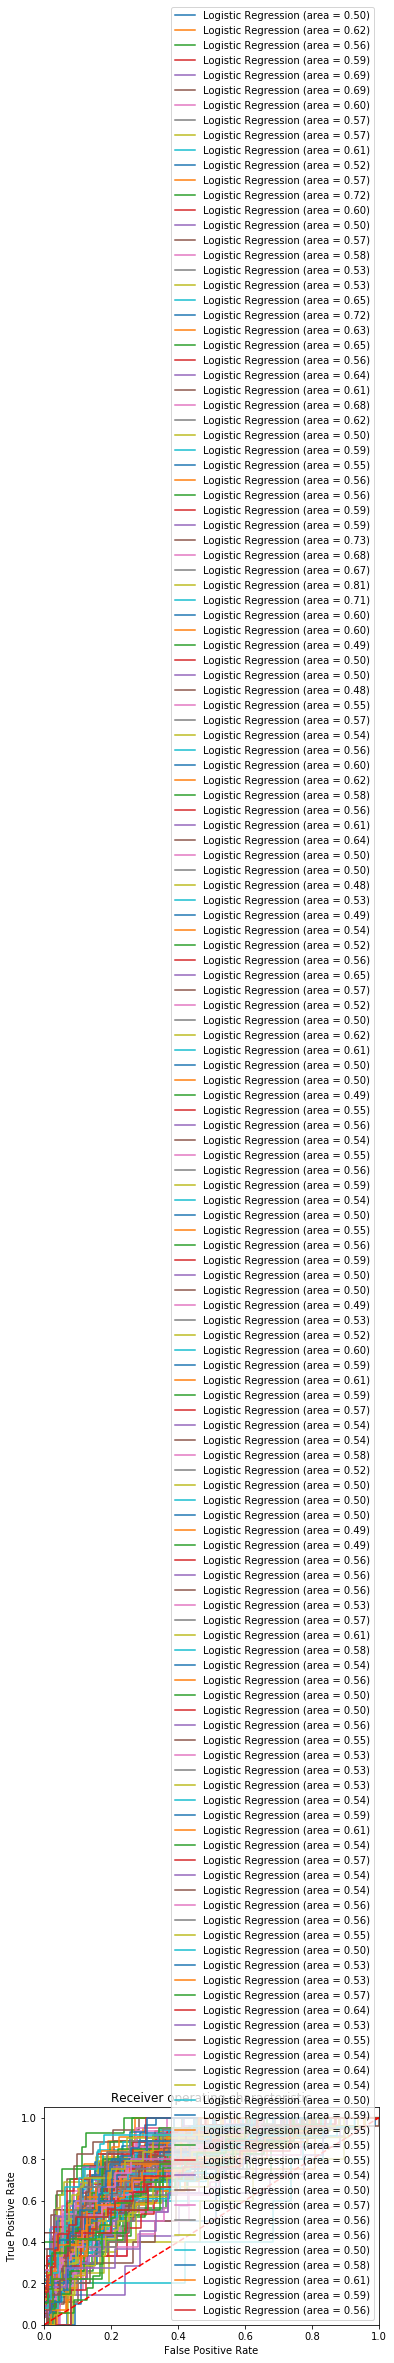

In [332]:
coefvalues = np.zeros((len(np.arange(32, 43)),len(np.arange(257, 271))))
aucvalues = np.zeros((len(np.arange(32, 43)),len(np.arange(257, 271))))
plt.figure()

for ilat, latx in enumerate(np.arange(32, 43)):
    for ilon, lonx in enumerate(np.arange(257, 271)):
        df_temp = df_merged[(df_merged.lat==latx)&(df_merged.lon==lonx)].dropna()
        
        X = df_temp[['pr','tas','tdps']]
        y = df_temp.loc[:, df_temp.columns == 'y']
        X['const']=1
        X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size=0.5, random_state=0)
        y_train  =y_trainT
        
        
#         whichytest = y_testT.index
#         df_merged_test = df_temp.loc[whichytest]
#         ds_merged_test = df_merged_test.set_index(['M','T']).to_xarray().mean('M')
#         del df_merged_test
#         df_merged_test = ds_merged_test.to_dataframe()
#         df_merged_test = df_merged_test.reset_index()
#         df_merged_test['y']=df_merged_test.apcp_rep>=quantile_threshold_all
#         X_testT = df_merged_test[['pr','tas','tdps','cape','logcape']]
#         y_testT = df_merged_test.loc[:, df_merged_test.columns == 'y']
#         X_testT['const']=1
#         y_testT = y_testT.loc[X_testT.dropna().index]
#         X_testT = X_testT.dropna()
        y_testT = y_testT.astype(int)
        y_test = y_testT*1.



        varname=['pr' ]   
        X_train = X_trainT[varname]
        X_test = X_testT[varname]
        # logreg = LogisticRegression()
        logreg = LogisticRegression(C=1e8)
        logreg.fit(X_train, y_train)
        logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
        coefvalues[ilat,ilon]= logreg.coef_
        aucvalues[ilat,ilon]= logit_roc_auc
#         print(logreg.intercept_)
#         print(logreg.solver)
#         y_pred = logreg.predict(X_test)
#         print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
#         print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 

#         logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
#         print(logit_roc_auc)
        fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
        plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")





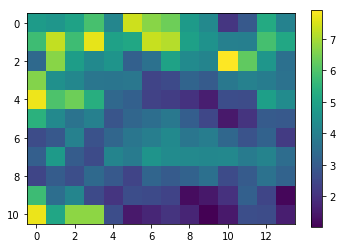

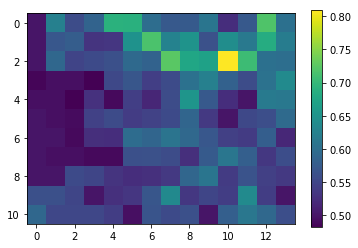

In [333]:
plt.figure()
plt.imshow(coefvalues)
plt.colorbar()
plt.figure()
plt.imshow(aucvalues)
plt.colorbar()

In [491]:
import numpy as np
from scipy.stats import chi2
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

def likelihood_ratio_test(features_alternate, labels, lr_model, features_null=None):
    """
    Compute the likelihood ratio test for a model trained on the set of features in
    `features_alternate` vs a null model.  If `features_null` is not defined, then
    the null model simply uses the intercept (class probabilities).  Note that
    `features_null` must be a subset of `features_alternative` -- it can not contain
    features that are not in `features_alternate`.
    Returns the p-value, which can be used to accept or reject the null hypothesis.
    """
    labels = np.array(labels)
    features_alternate = np.array(features_alternate)
    
#     if features_null!=None:
#         features_null = np.array(features_null)
        
#         if features_null.shape[1] >= features_alternate.shape[1]:
#             raise ValueError, "Alternate features must have more features than null features"
        
    lr_model.fit(features_null, labels)
    print(lr_model.coef_)
    null_prob = lr_model.predict_proba(features_null)[:, 1]
    df = features_alternate.shape[1] - features_null.shape[1]
    print(df)
#     else:
#         null_prob = sum(labels) / float(labels.shape[0]) * \
#                     np.ones(labels.shape)
#         df = features_alternate.shape[1]
    
    lr_model.fit(features_alternate, labels)
    alt_prob = lr_model.predict_proba(features_alternate)
    print(lr_model.coef_)
    alt_log_likelihood = -log_loss(labels,
                                   alt_prob,
                                   normalize=False)
    null_log_likelihood = -log_loss(labels,
                                    null_prob,
                                    normalize=False)
    print(alt_log_likelihood,null_log_likelihood)
    G = 2 * (alt_log_likelihood - null_log_likelihood)
    p_value = chi2.sf(G, df)

    return p_value

In [462]:
def plot_pvalues( p_values, title):
    log_p_values = np.log10(p_values)
    plt.clf()
    plt.boxplot(x=log_p_values)
    plt.xlabel("Variable", fontsize=16)
    plt.ylabel("P-Value (log10)", fontsize=16)
    plt.title(title, fontsize=18)
#     plt.savefig(flname, DPI=200)


In [ ]:
for i in xrange(len(CORR_PROBS)):
    # force into Nx1 matrix
    column = features[:, i].reshape(-1, 1)
    p_value = likelihood_ratio_test(column,
                                    labels,
                                    model)
    feature_log_p_values[j, i] = p_value
    
plot_pvalues(feature_log_p_values,
                 "")


In [104]:
# varname=['const','pr','tdps']
# X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size=0.7, random_state=0)
# y_trainT = y_trainT.astype(int)
# y_testT = y_testT.astype(int)
# X_train = X_trainT[varname]
# X_test = X_testT[varname]
# logit_model=sm.Logit(y_trainT,X_train)
# result1=logit_model.fit()
# # print(result1.summary2())
# predictions = result1.predict(X_test)
# predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# print(classification_report(y_testT, predictions_nominal, digits=3))
# print(metrics.confusion_matrix(y_testT, predictions_nominal))


# where_1 = y_trainT[y_trainT==1]
# where_0 = y_trainT[y_trainT==0]
# for ir in range(0,10):
#     NN = y_trainT[y_trainT==1].count()
#     print(NN.values)
#     which_0 = where_0.dropna().sample(NN.values*2).index    
#     XX0 = X_train.loc[which_0]
#     XX1 = X_train.loc[where_1.dropna().index]
#     YY0 = where_0.dropna().loc[which_0]
#     YY1 = where_1.dropna()
#     logit_model=sm.Logit(pd.concat([YY1,YY0]),pd.concat([XX1,XX0]))
#     result1=logit_model.fit()
# #     print(result1.summary2())
#     predictions = result1.predict(X_test)
#     predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
#     print(classification_report(y_testT, predictions_nominal, digits=3))
#     print(metrics.confusion_matrix(y_testT, predictions_nominal))


['pr', 'tas', 'cape']


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0
[[ 1.15968929e+00 -7.12871208e-03  8.05000073e-04]]
[0.0293331]
Accuracy of logistic regression classifier on test set: 0.77
log loss: 0.4984
0.5460477092658165


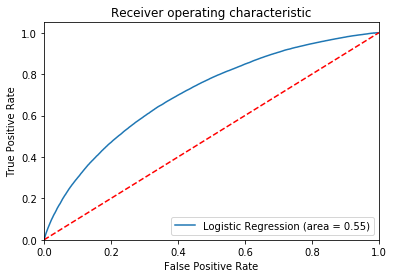

['pr', 'tas']


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0
[[ 1.34034886 -0.02272774]]
[5.17836996]
Accuracy of logistic regression classifier on test set: 0.77
log loss: 0.5053
0.540276782365082


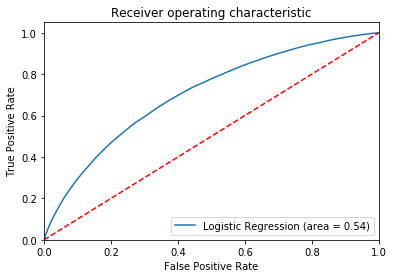

0.0


In [459]:
varname=['pr','tas' ,'cape'   ] 
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)
print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
logregA = logreg
X_testA = X_test
alt_log_likelihood = -log_loss(y_test, logregA.predict_proba(X_test), normalize=False)

varname=['pr','tas'   ] 
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)
print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
logregB = logreg
X_testB = X_test
null_log_likelihood = -log_loss(y_test, logregB.predict_proba(X_test), normalize=False)

G = 2 * (alt_log_likelihood - null_log_likelihood)
df = X_testA.shape[1] - X_testB.shape[1]
p_value = chi2.sf(G, df)
print(p_value)
